## Notebook settings

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

## Imports

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import logging
import tpvalidator.mcprod.workspace as workspace
import tpvalidator.utilities as utils
import tpvalidator.mcprod.analyzers.snn as snn

from rich import print
from tpvalidator.utilities import temporary_log_level, subplot_autogrid, pandas_backend
from tpvalidator.histograms import uproot_hist_mean_std


# Load ADC mean and standard deviation from wafevorm histograms

In [3]:
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.INFO):
    ws = workspace.TriggerPrimitivesWorkspace("../../data/vd/ar39/100events/trigtree_tpg_vd_ar39.root")

print(ws.info)

INFO:TriggerPrimitivesWorkspace:tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker found with 72540769 rows


{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 23,
            'threshold_tpg_plane1': 23,
            'threshold_tpg_plane2': 26,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

In [4]:
ws.add_rawdigits('../../data/vd/ar39/100events/trigger_digits_waves_detsim_vd_ar39.root')

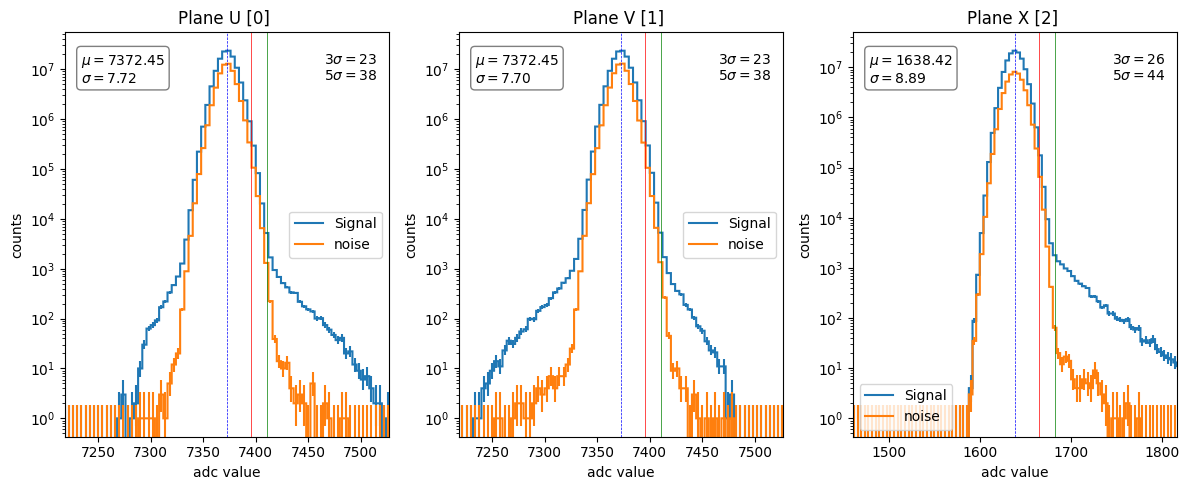

In [5]:
fig = snn.draw_signal_and_noise_adc_distros(ws)
fig.tight_layout()

# TP sample validation
## Distribution of point of origin in the detector

In [6]:
all_tps = snn.TPSignalNoisePreSelection(ws.tps)
alltp_ana = snn.TPSignalNoiseAnalyzer(all_tps)

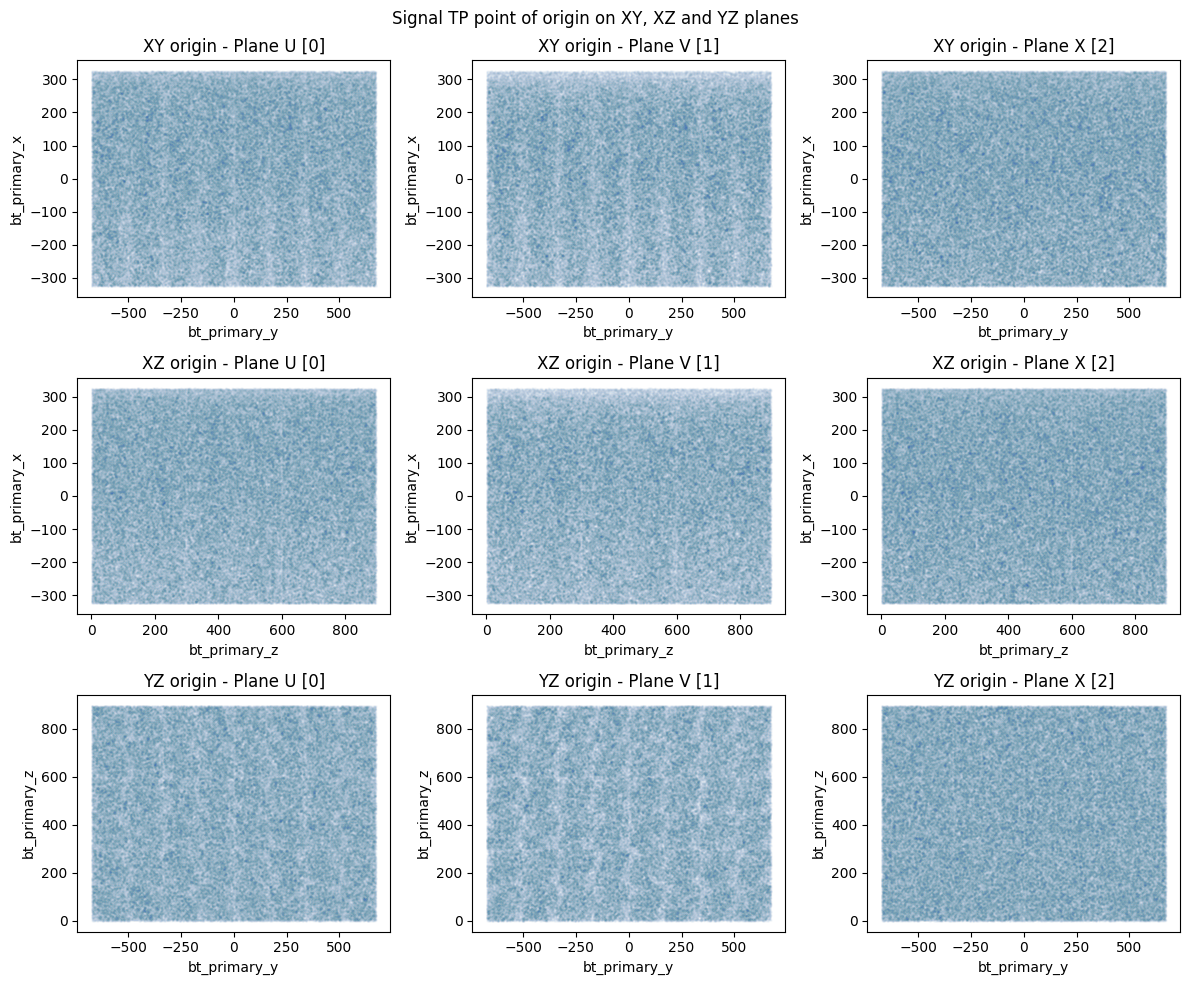

In [7]:
fig = alltp_ana.draw_tp_sig_origin_2d_dist()
fig.tight_layout()

In [8]:
pd.options.plotting.backend = 'plotly'
import plotly.express as px
# ws.tps.query('event == 1 & TP_peakADC > 50').plot.scatter(x='TP_channel', y='TP_peakT', size='TP_peakADC', color_continuous_scale=px.colors.sequential.Viridis, height=500, width=600)

pd.options.plotting.backend = 'matplotlib'
with pandas_backend('plotly') as x:
    f = ws.tps.query('event == 1 & adc_peak > 50').plot.scatter(x='channel', y='time_start', size='adc_peak', color="bt_is_signal", color_continuous_scale=px.colors.sequential.Viridis, height=800, width=900)
    f.show()


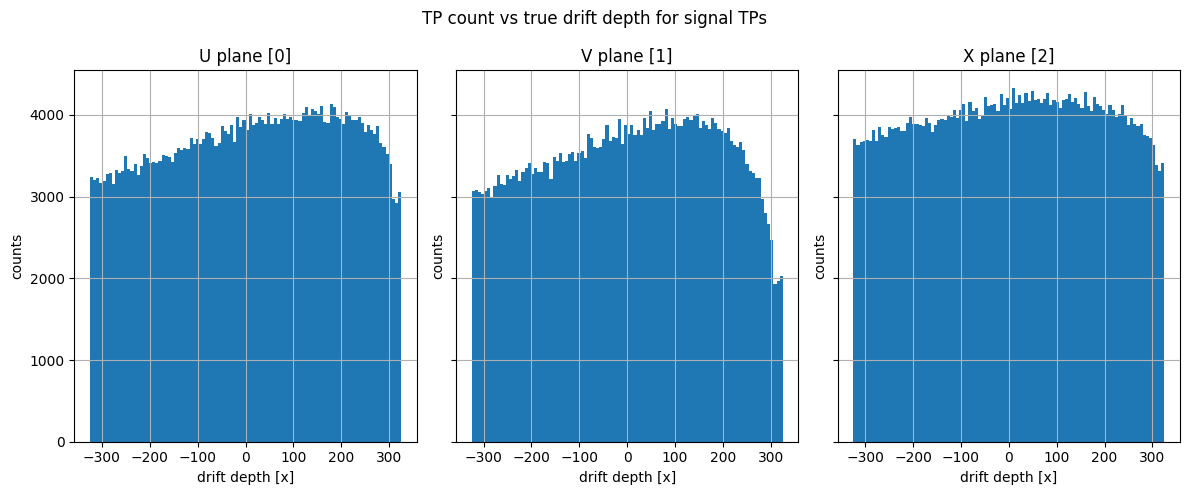

In [9]:
fig = alltp_ana.draw_tp_sig_drift_depth_dist()

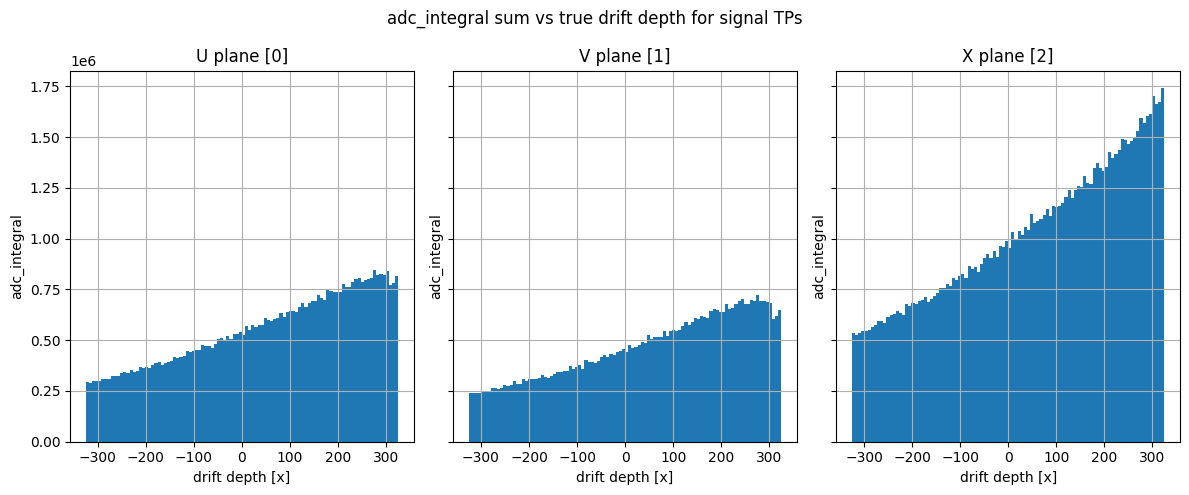

In [10]:
fig = alltp_ana.draw_tp_sig_drift_depth_dist(weight_by='adc_integral')

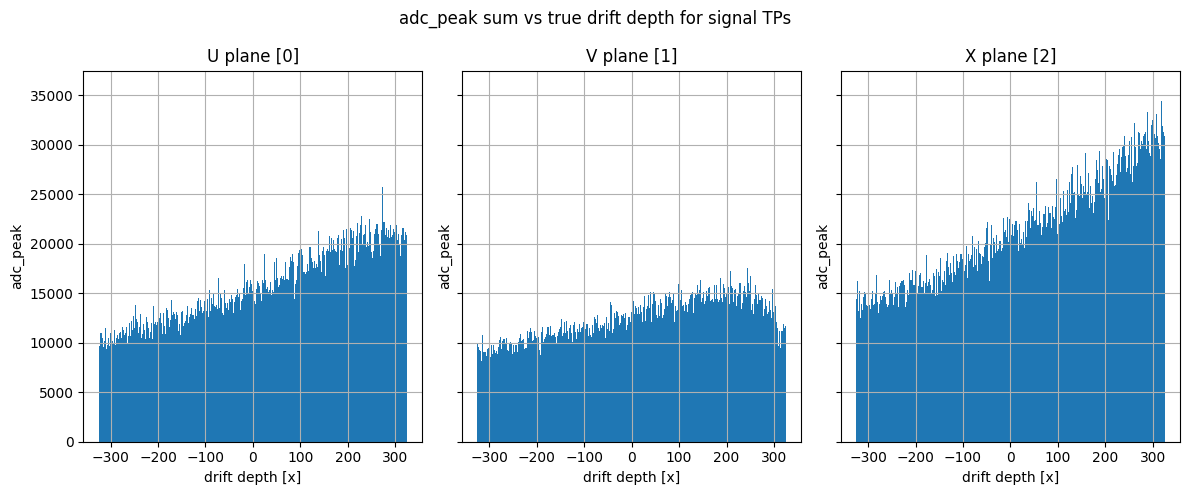

In [11]:
fig = alltp_ana.draw_tp_sig_drift_depth_dist(weight_by='adc_peak', bins=1000)

# Dataset validation: TP distributions

### TP distribution in channel and time - one event with increasing peak ADC cuts

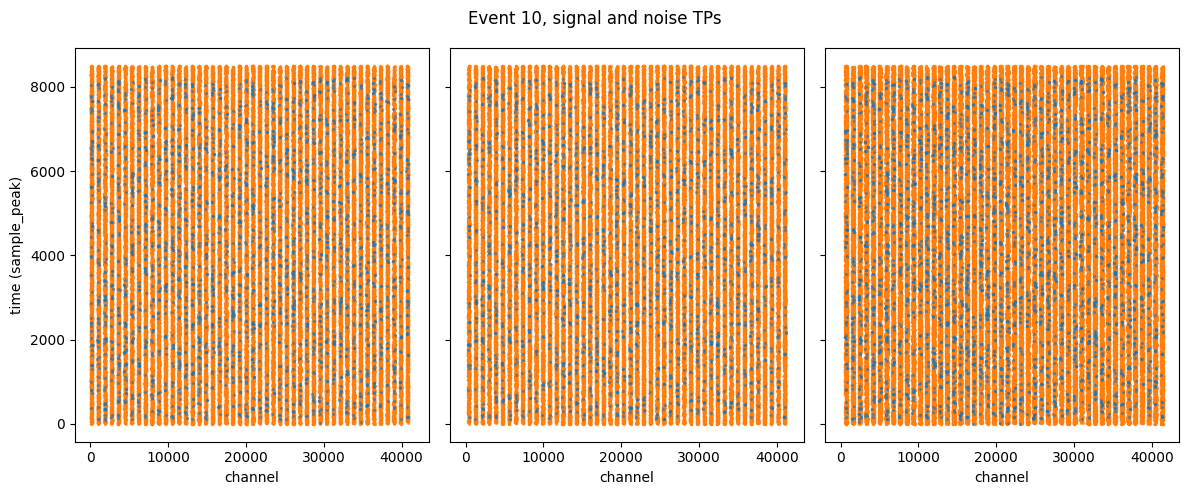

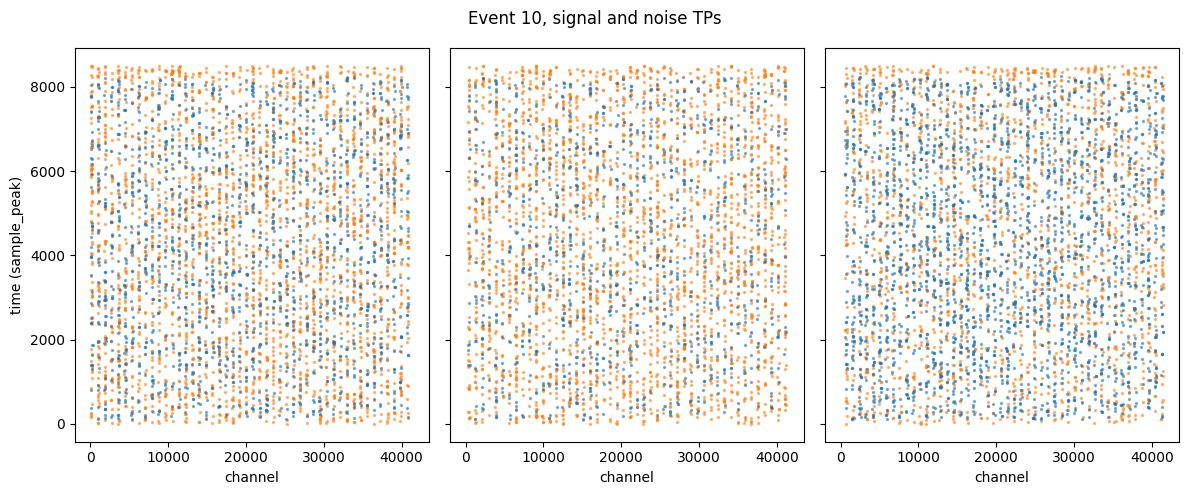

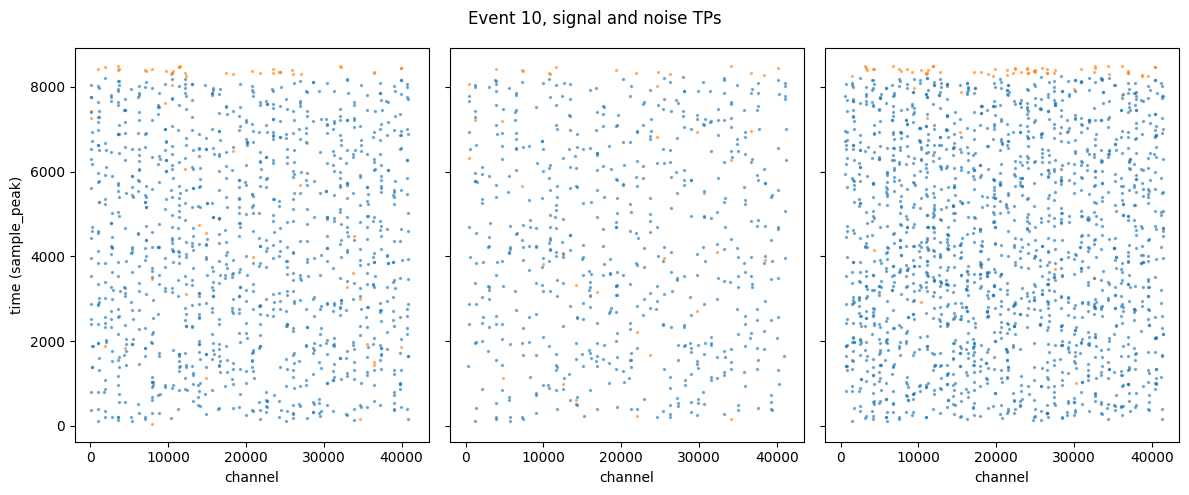

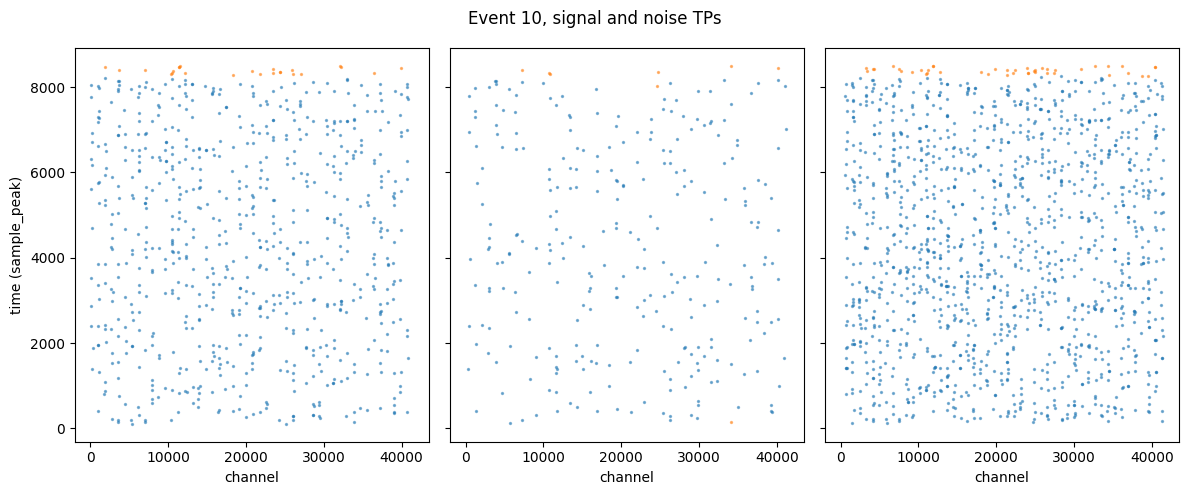

In [14]:
x = snn.TPSignalNoiseAnalyzer(all_tps.query('adc_peak > 26'))
fig = x.draw_tp_event(10)
x = snn.TPSignalNoiseAnalyzer(all_tps.query('adc_peak > 36'))
fig = x.draw_tp_event(10)
x = snn.TPSignalNoiseAnalyzer(all_tps.query('adc_peak > 46'))
fig = x.draw_tp_event(10)
x = snn.TPSignalNoiseAnalyzer(all_tps.query('adc_peak > 56'))
fig = x.draw_tp_event(10)


### TP distribution in channel and time - all events

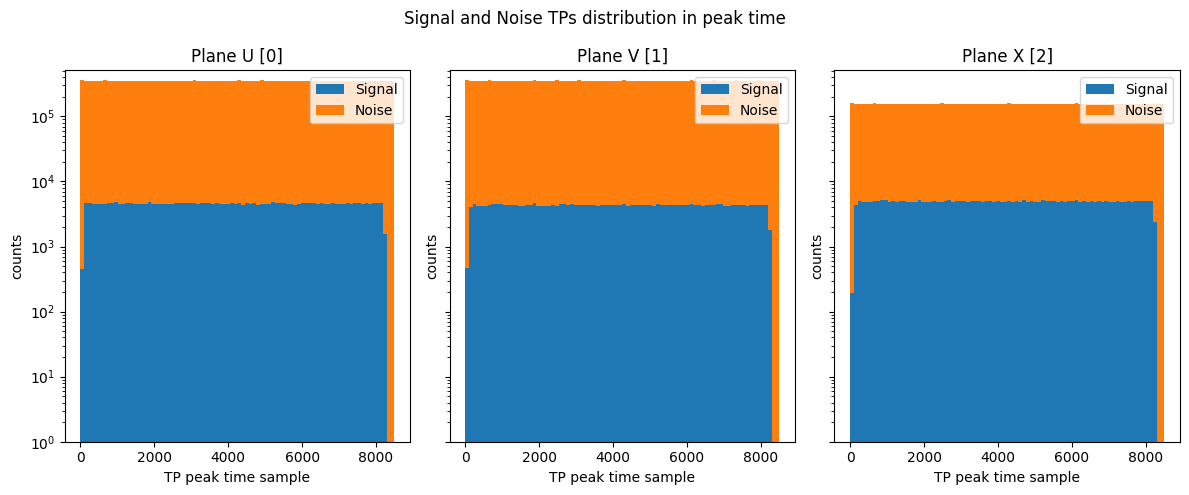

In [16]:
fig = alltp_ana.draw_tp_start_sample_dist()

# Cleaning: removing regions with non-even backtracking efficiency

In [18]:
tpw = snn.TPSignalNoisePreSelection(ws.tps[(ws.tps.sample_start >100) & (ws.tps.sample_start <8100)])
tp_ana = snn.TPSignalNoiseAnalyzer(tpw)

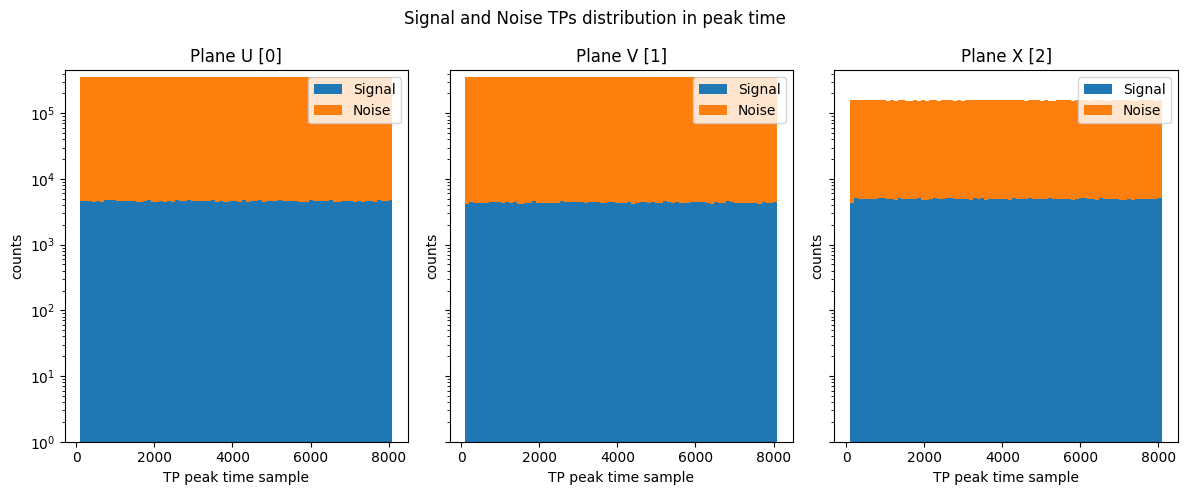

In [19]:
fig = tp_ana.draw_tp_start_sample_dist()


# adcpeak, time-over-threshold and SumADC distribution for Ar39 and noise

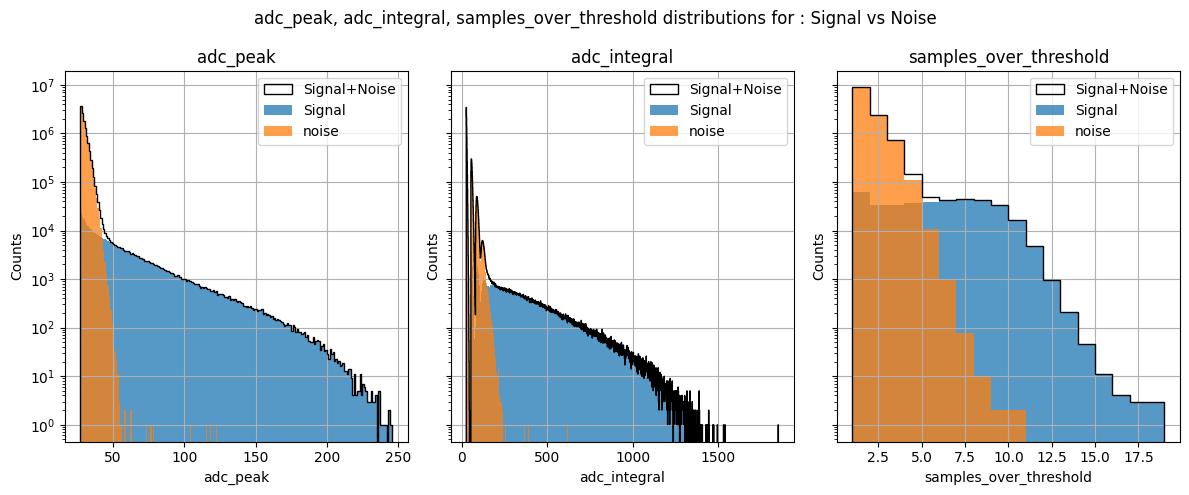

In [20]:
fig = tp_ana.draw_tp_signal_noise_dist()
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/analyzers/snn.py:406: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



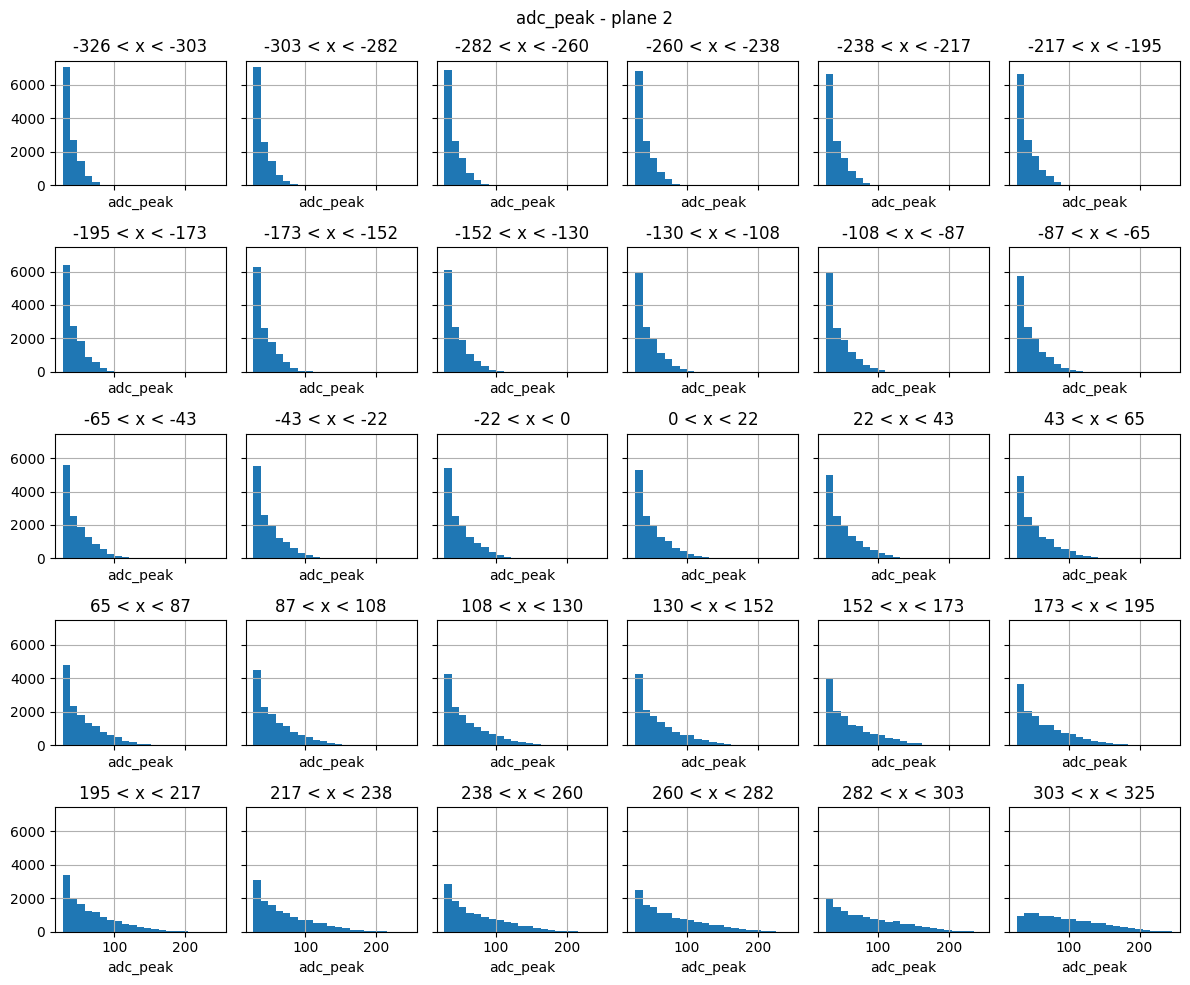

In [21]:
fig = tp_ana.draw_variable_in_drift_grid('adc_peak', downsampling=10, sharex=True, sharey=True, figsize=(12,10))
fig.tight_layout()

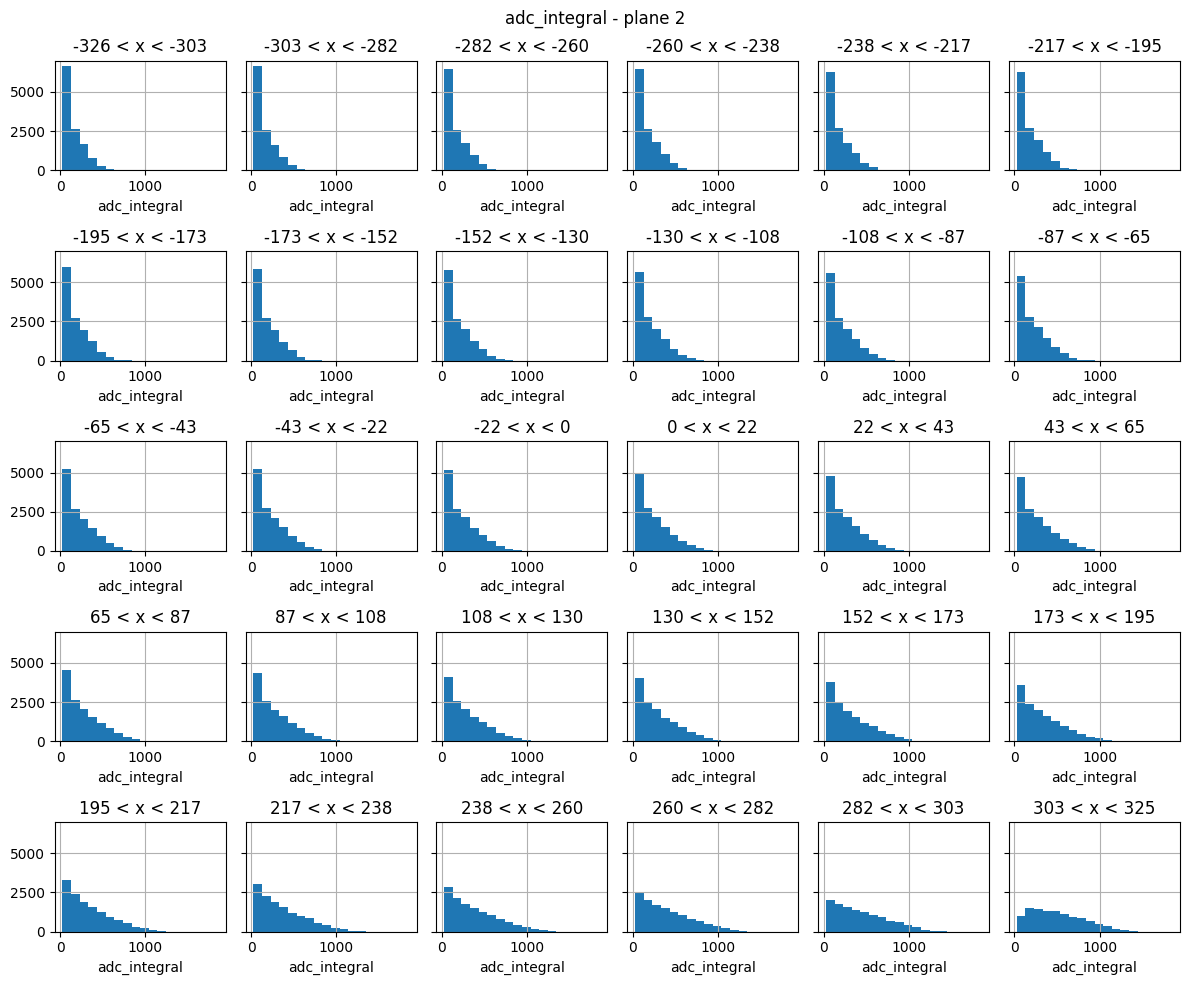

In [22]:
fig = tp_ana.draw_variable_in_drift_grid('adc_integral', downsampling=100, sharey=True, figsize=(12,10))
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/analyzers/snn.py:406: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



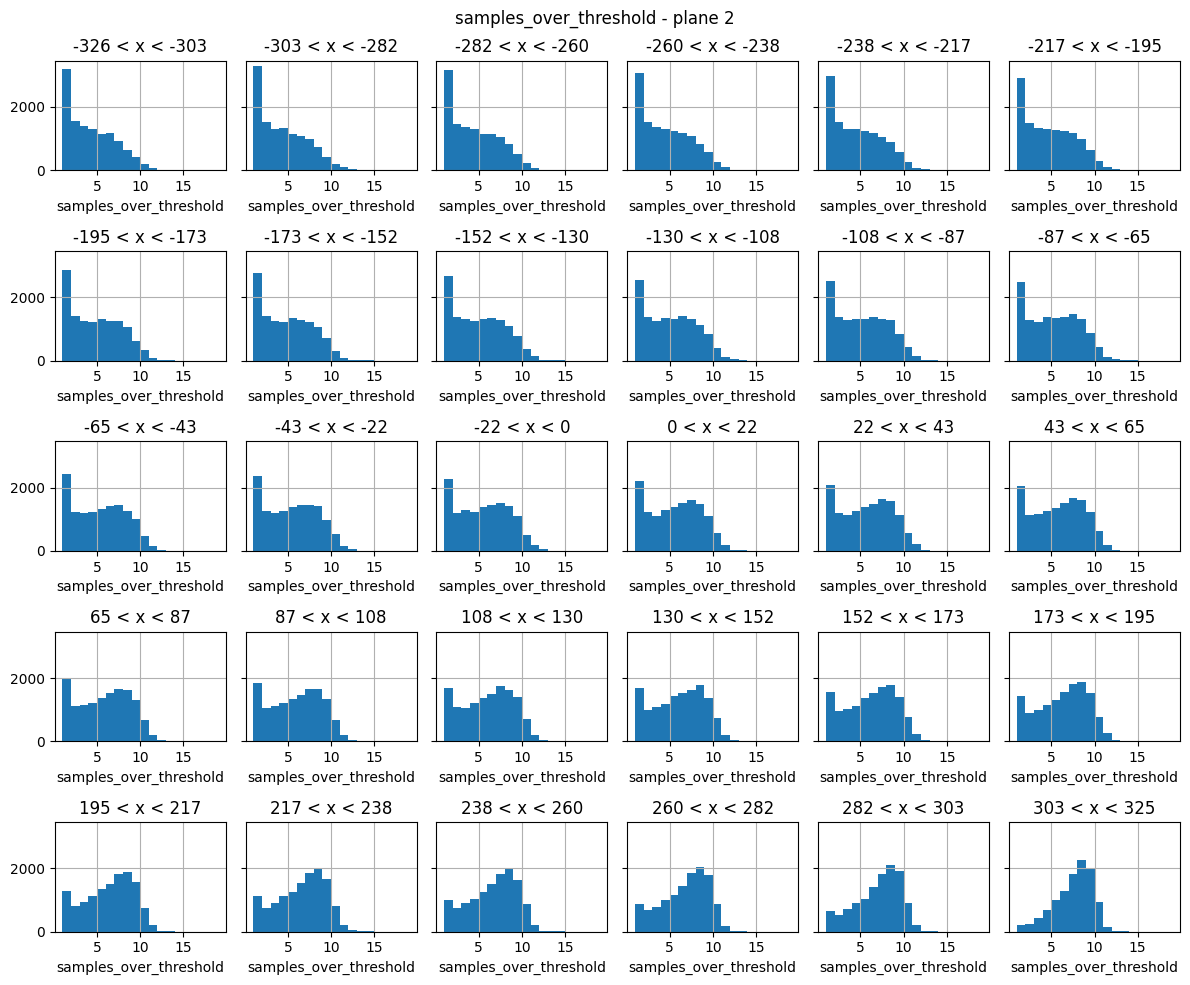

In [32]:
fig = tp_ana.draw_variable_in_drift_grid('samples_over_threshold', downsampling=1, log=False, sharey=True, figsize=(12,10))
fig.tight_layout()

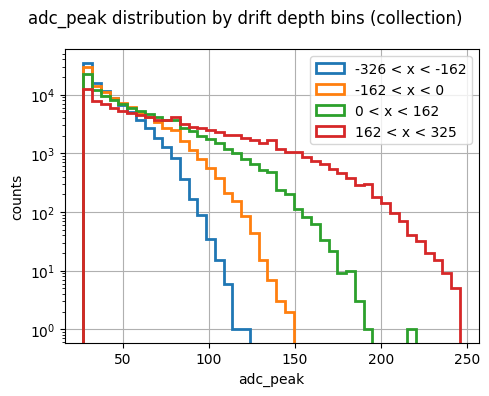

In [ ]:
fig = tp_ana.draw_variable_drift_stack('adc_peak', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()

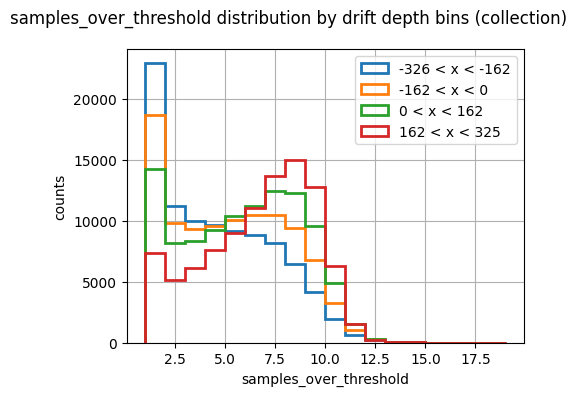

In [ ]:
fig = tp_ana.draw_variable_drift_stack('samples_over_threshold', downsampling=1, n_x_bins=4, log=False, figsize=(5,4))
fig.tight_layout()


/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/mcprod/analyzers/snn.py:430: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



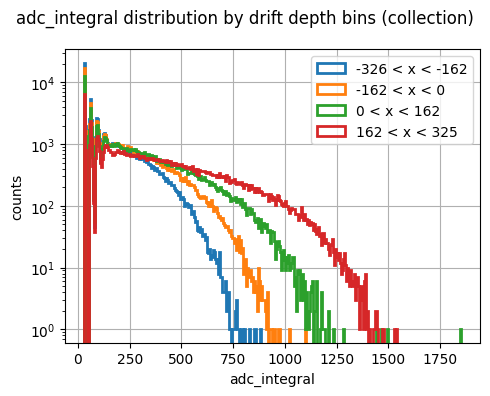

In [24]:
fig = tp_ana.draw_variable_drift_stack('adc_integral', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()


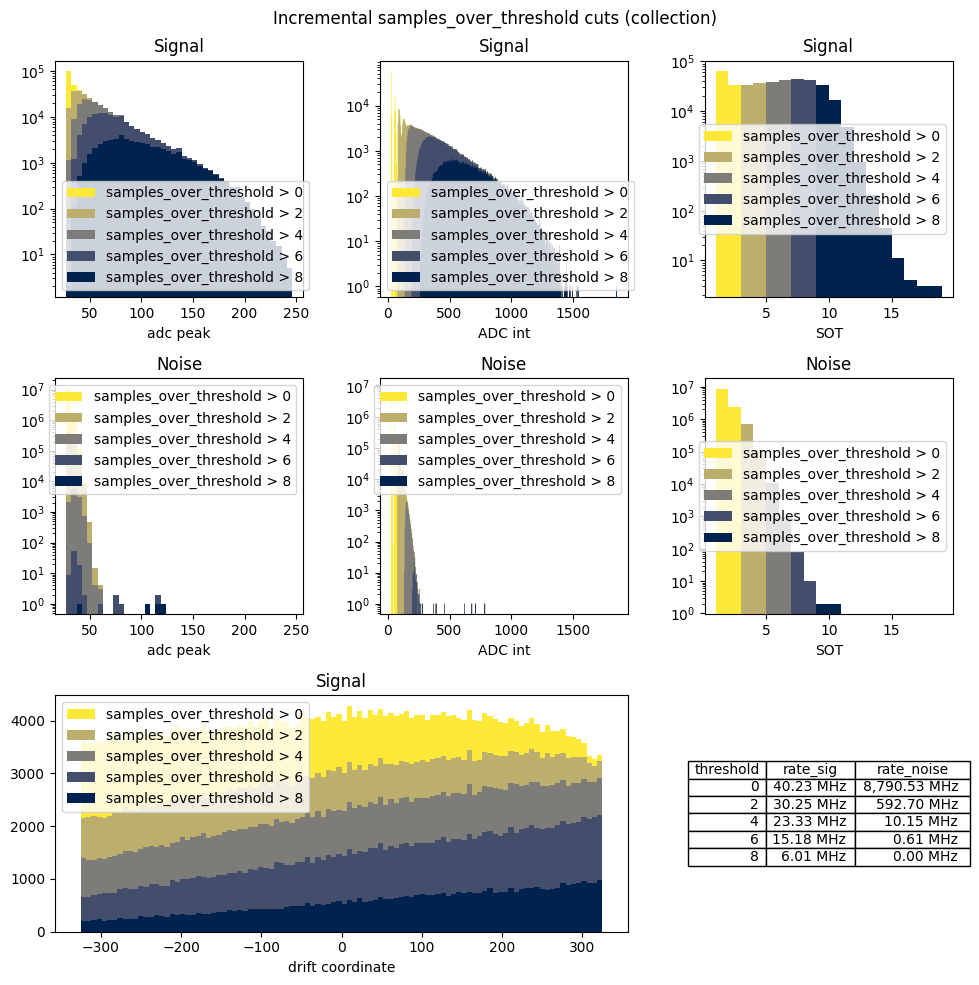

In [25]:
tot_cuts = [t for t in range(0,10,2)]

fig = tp_ana.draw_variable_cut_sequence('samples_over_threshold', tot_cuts, log=True, figsize=(10,10))


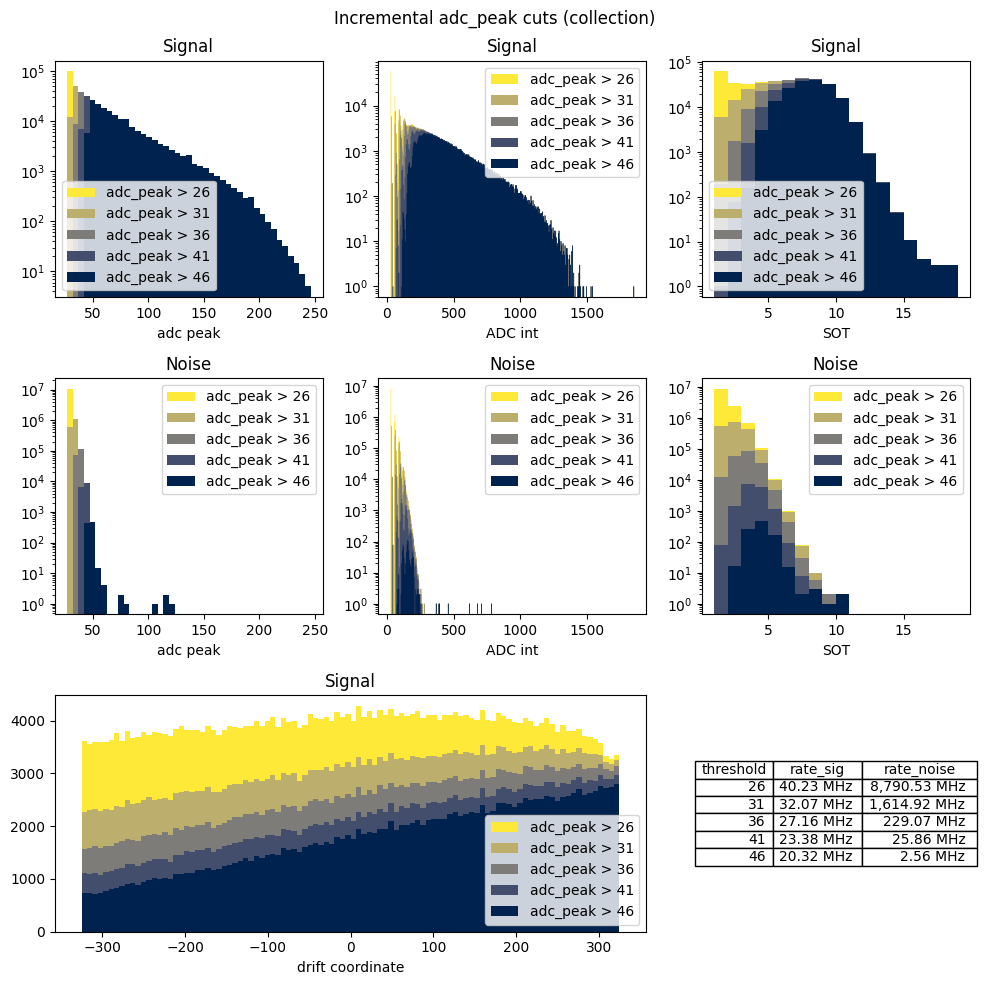

In [26]:
cuts = [t for t in range(26, 50, 5)]

fig = tp_ana.draw_variable_cut_sequence('adc_peak', cuts, log=True, figsize=(10,10))
fig.tight_layout()

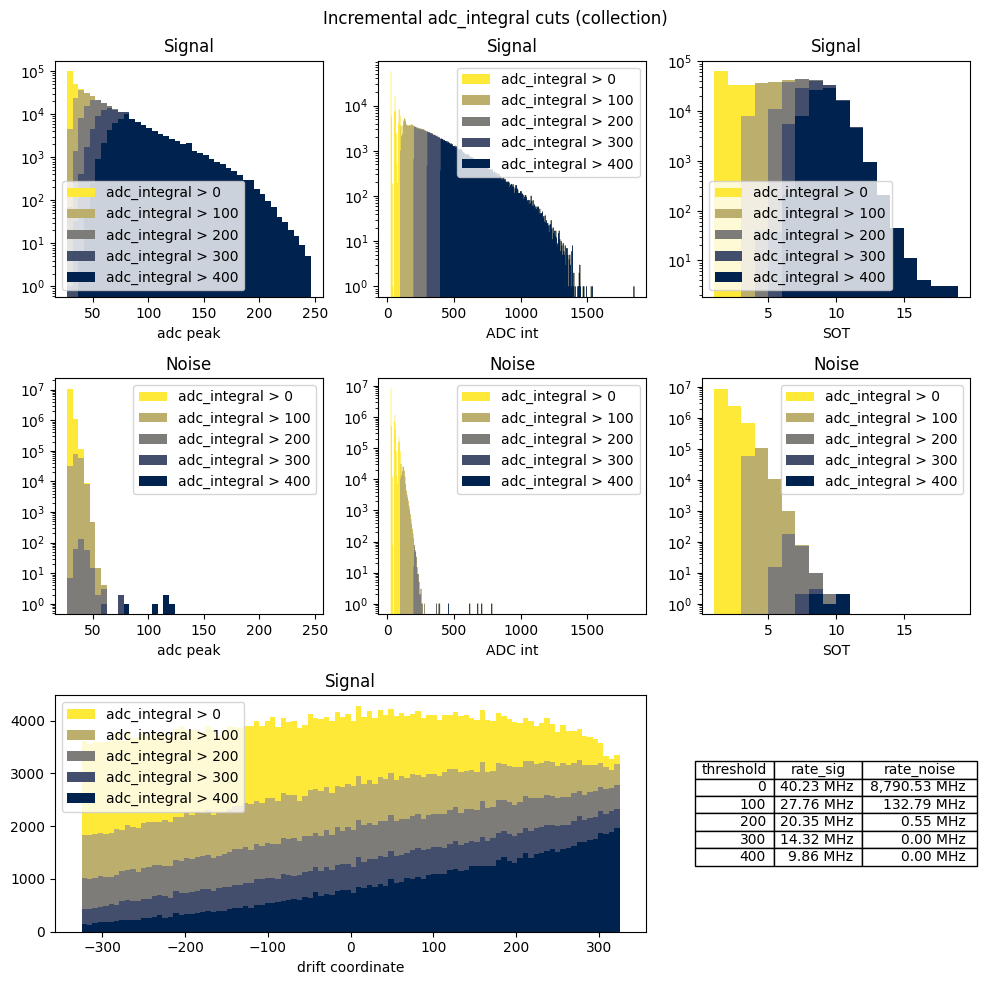

In [27]:
cuts = [t for t in range(0, 500, 100)]

fig = tp_ana.draw_variable_cut_sequence('adc_integral', cuts, figsize=(10,10), log=True)
fig.tight_layout()

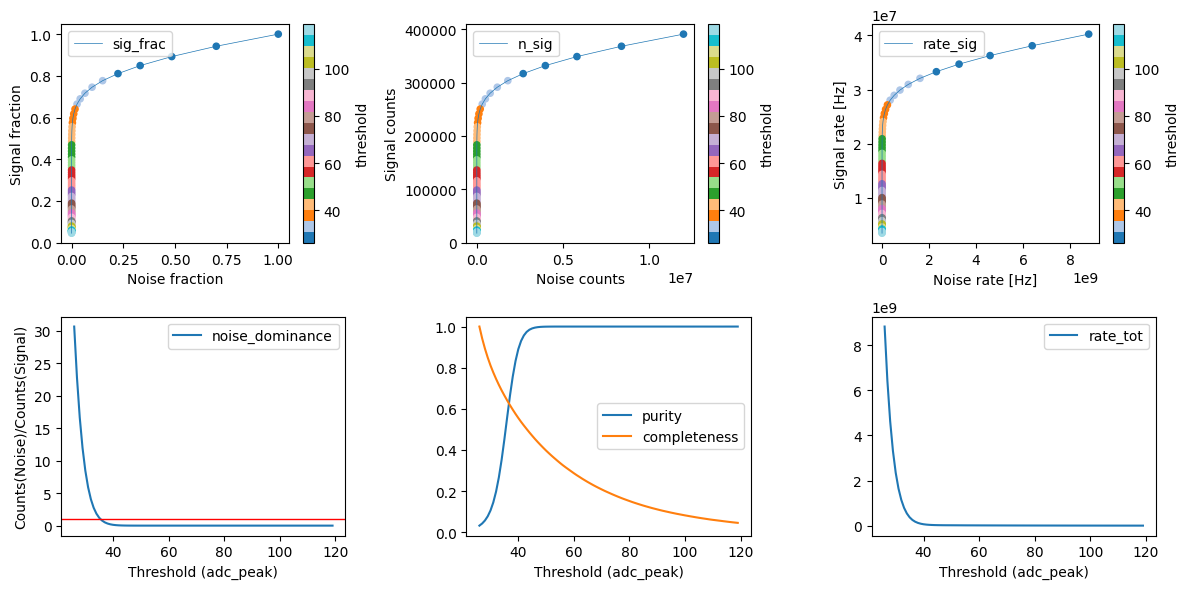

In [28]:
thresholds = [t for t in range(26, 120, 1)]

fig = tp_ana.draw_threshold_scan('adc_peak', thresholds)
fig.tight_layout()

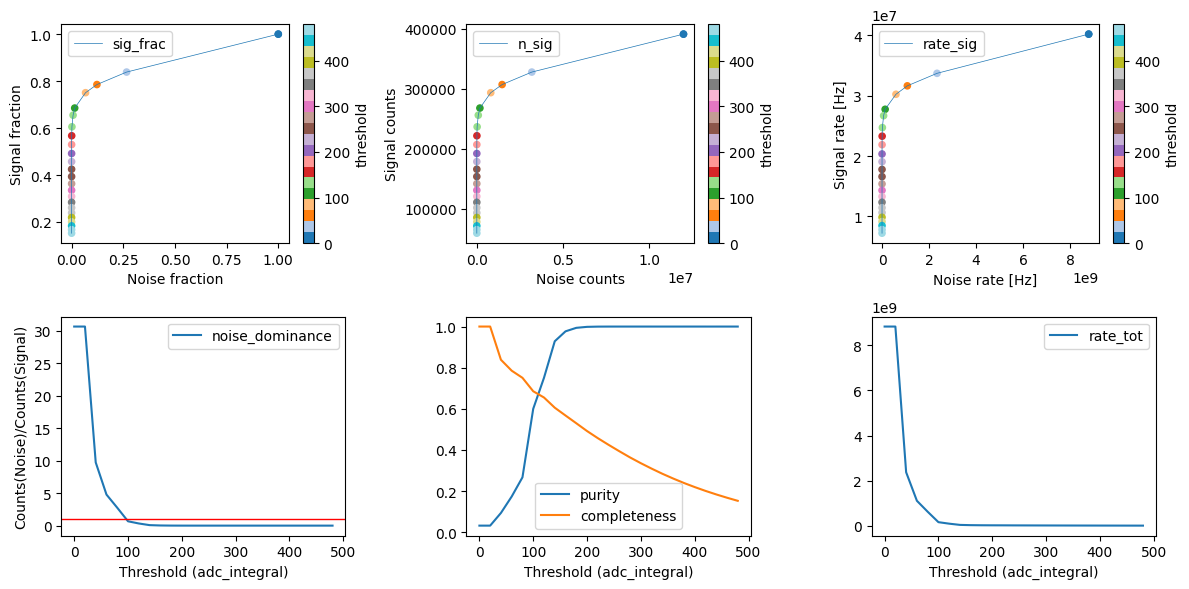

In [29]:
thresholds = [t for t in range(0, 500, 20)]

fig = tp_ana.draw_threshold_scan('adc_integral', thresholds)
fig.tight_layout()

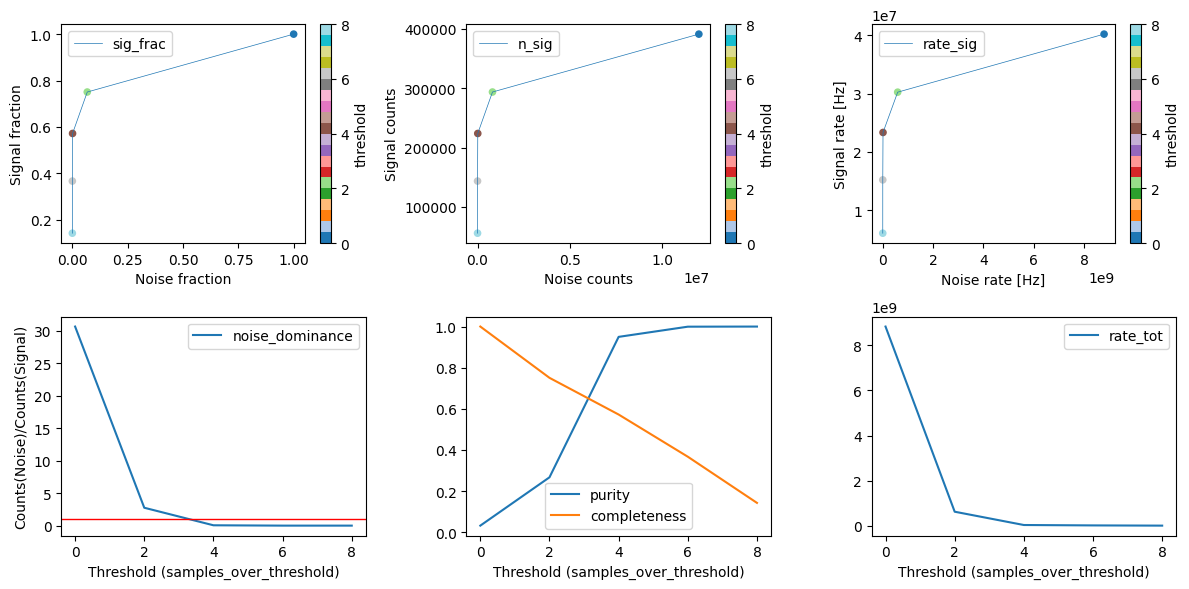

In [30]:
thresholds = [t for t in range(0,10,2)]

fig = tp_ana.draw_threshold_scan('samples_over_threshold', thresholds)
fig.tight_layout()

# Investigating weird TP and IDES distributions

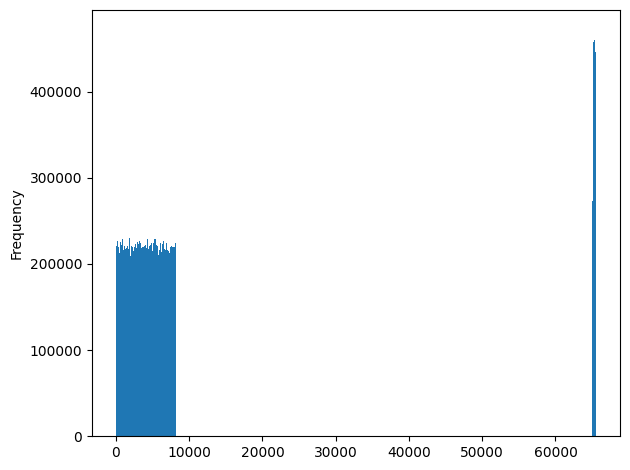

In [ ]:
fig, ax = plt.subplots()
ws.ides.timestamp.plot.hist(bins=1000)
fig.tight_layout()

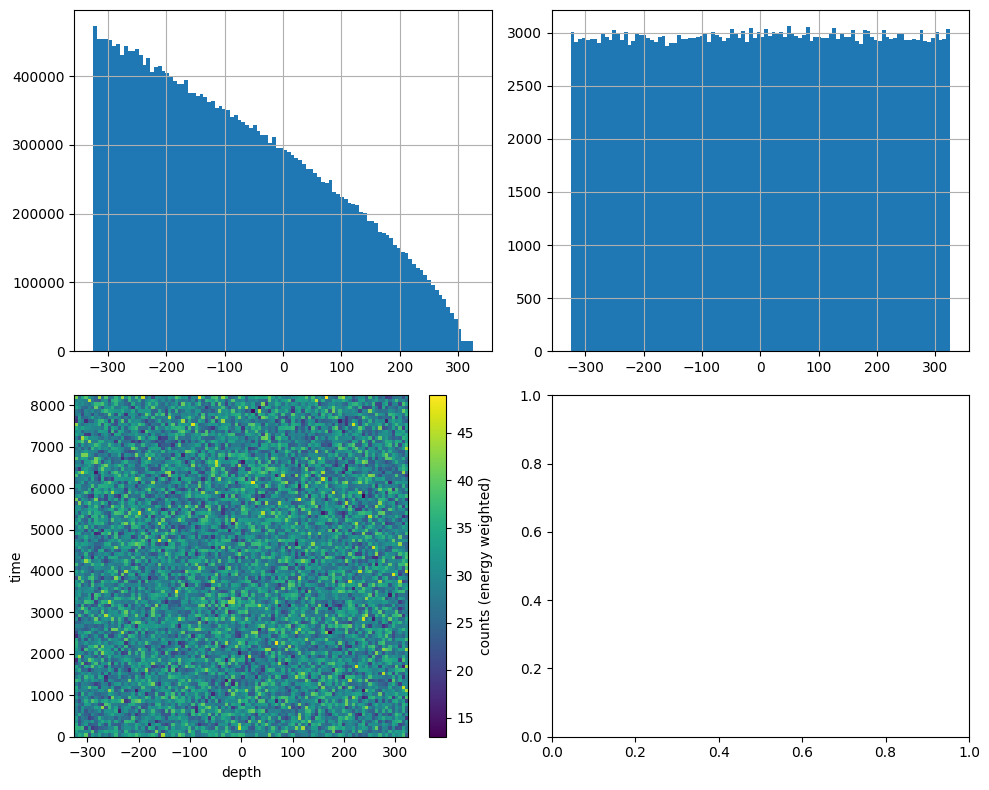

In [ ]:
import matplotlib as mpl
fig, axes = plt.subplots(2,2, figsize=(10,8))
norm=mpl.colors.LogNorm()

ides_clean = ws.ides.query('time < 10000')


ax=axes[0][0]
ides_clean.x.hist(bins=100, ax=ax)
ax=axes[0][1]
ides_clean.x.hist(bins=100, weights=ides_clean.energy, ax=ax)
ax = axes[1][0]
h2d = ax.hist2d(ides_clean.x, ides_clean.time, weights=ides_clean.energy, bins=(100, 100))
ax.set_ylabel('time')
ax.set_xlabel('depth')
cbar = fig.colorbar(h2d[3], ax=ax)
cbar.set_label('counts (energy weighted)')
fig.tight_layout()


In [47]:
ws.tps.event.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=uint32)

In [ ]:
weird_ides = ws.ides[ws.ides.time > 8500]
display(weird_ides)
first_ides = ws.ides[ws.ides.time < 100]
display(first_ides)


event       run  subrun  n_ides  channel   time  track_id  \
entry subentry                                                              
0     466           1  20000047       0  308962      108  65350     13338   
      467           1  20000047       0  308962      108  65350     13338   
      468           1  20000047       0  308962      108  65351     13338   
      469           1  20000047       0  308962      108  65351     13338   
      470           1  20000047       0  308962      108  65352     13338   
...               ...       ...     ...     ...      ...    ...       ...   
99    309225      100  20000047       0  309595    41427  65246      6875   
      309226      100  20000047       0  309595    41427  65247      6875   
      309227      100  20000047       0  309595    41427  65248      6875   
      309228      100  20000047       0  309595    41427  65249      6875   
      309229      100  20000047       0  309595    41427  65250      6875   

                mcgen_key  n_electrons    energy           x           y  \
entry subentry                                                             
0     466               0   247.365677  0.012571  276.644745 -659.078369   
      467               0   119.060219  0.010584  276.652069 -659.084656   
      468               0  2060.005859  0.104692  276.644745 -659.078369   
      469               0   731.576538  0.065032  276.652069 -659.084656   
      470               0   726.811401  0.036937  276.644745 -659.078369   
...                   ...          ...       ...         ...         ...   
99    309225            0    52.605354  0.003962   96.971237  593.558716   
      309226            0    51.393204  0.003870   96.971237  593.558716   
      309227            0    27.895889  0.002101   96.971237  593.558716   
      309228            0     8.403118  0.000633   96.971237  593.558716   
      309229            0     1.401907  0.000106   96.971237  593.558716   

                         z  
entry subentry              
0     466       143.752151  
      467       143.750198  
      468       143.752151  
      469       143.750198  
      470       143.752151  
...                    ...  
99    309225    872.858215  
      309226    872.858215  
      309227    872.858215  
      309228    872.858215  
      309229    872.858215  

[3461739 rows x 13 columns]

event       run  subrun  n_ides  channel  time  track_id  \
entry subentry                                                             
0     605           1  20000047       0  308962      131     3     14739   
      606           1  20000047       0  308962      131     4     14739   
      607           1  20000047       0  308962      131     5     14739   
      608           1  20000047       0  308962      131     6     14739   
      609           1  20000047       0  308962      131     7     14739   
...               ...       ...     ...     ...      ...   ...       ...   
99    309187      100  20000047       0  309595    41420     3      8649   
      309196      100  20000047       0  309595    41421     0      8649   
      309197      100  20000047       0  309595    41421     1      8649   
      309198      100  20000047       0  309595    41421     2      8649   
      309199      100  20000047       0  309595    41421     3      8649   

                mcgen_key  n_electrons    energy          x           y  \
entry subentry                                                            
0     605               0     1.620536  0.000209   3.332465 -639.864807   
      606               0     7.838993  0.001009   3.332465 -639.864807   
      607               0    25.072035  0.003228   3.332465 -639.864807   
      608               0    53.056206  0.006830   3.332465 -639.864807   
      609               0    74.318878  0.009567   3.332465 -639.864807   
...                   ...          ...       ...        ...         ...   
99    309187            0    11.216750  0.000727  56.360992  659.764404   
      309196            0  1129.979492  0.072480  56.361008  659.764221   
      309197            0   252.726990  0.016226  56.361004  659.764221   
      309198            0    76.460922  0.004912  56.361004  659.764221   
      309199            0    14.054015  0.000903  56.361004  659.764221   

                         z  
entry subentry              
0     605       145.933273  
      606       145.933273  
      607       145.933273  
      608       145.933273  
      609       145.933273  
...                    ...  
99    309187    870.033447  
      309196    870.033569  
      309197    870.033569  
      309198    870.033569  
      309199    870.033569  

[344887 rows x 13 columns]

In [ ]:
from tpvalidator.backtracker import BackTrackerPlotter

In [ ]:
bt = BackTrackerPlotter(ws, 1)

[1]
1
found 22314 channels
Loading tree into np arrays
Done loading tree into np arrays
Converting np arrays to dataframe
Done converting np arrays to dataframe
Expanding waveforms
Done expanding waveforms


/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/workspace.py:177: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_waveforms['sample_id'] = np.arange(0, len(df_waveforms))


In [ ]:
tps_ev1 = tpw.query('event==1')
display(tps_ev1.p2)

event   n_TPs  TP_channel  TP_startT  TP_peakT  TP_peakADC  \
entry subentry                                                               
0     12048         1  721195         572        886       886          32   
      12049         1  721195         572       1966      1966          28   
      12050         1  721195         572       2795      2795          29   
      12051         1  721195         572       3851      3851          30   
      12052         1  721195         572       4277      4277          32   
...               ...     ...         ...        ...       ...         ...   
      721190        1  721195       41471       6800      6800          28   
      721191        1  721195       41471       6965      6965          29   
      721192        1  721195       41471       7423      7423          28   
      721193        1  721195       41471       7558      7558          28   
      721194        1  721195       41471       7869      7869          33   

                TP_SADC  TP_TOT  TP_plane  TP_TPC    TP_trueX    TP_trueY  \
entry subentry                                                              
0     12048          32       1         2       0   -1.000000   -1.000000   
      12049          28       1         2       0   -1.000000   -1.000000   
      12050          57       2         2       0   -1.000000   -1.000000   
      12051          30       1         2       0   -1.000000   -1.000000   
      12052          59       2         2       0   -1.000000   -1.000000   
...                 ...     ...       ...     ...         ...         ...   
      721190         28       1         2      47   -1.000000   -1.000000   
      721191         29       1         2      47   -1.000000   -1.000000   
      721192         28       1         2      47   -1.000000   -1.000000   
      721193         28       1         2      47 -182.265442  624.720398   
      721194         62       2         2      47   -1.000000   -1.000000   

                  TP_trueZ  TP_true_n_el  TP_signal  TP_mcgen_key  TP_n_mcgen  
entry subentry                                                                 
0     12048      -1.000000      -1.00000          0            -1          -1  
      12049      -1.000000      -1.00000          0            -1          -1  
      12050      -1.000000      -1.00000          0            -1          -1  
      12051      -1.000000      -1.00000          0            -1          -1  
      12052      -1.000000      -1.00000          0            -1          -1  
...                    ...           ...        ...           ...         ...  
      721190     -1.000000      -1.00000          0            -1          -1  
      721191     -1.000000      -1.00000          0            -1          -1  
      721192     -1.000000      -1.00000          0            -1          -1  
      721193    896.014648     298.11499          1             0           1  
      721194     -1.000000      -1.00000          0            -1          -1  

[121679 rows x 17 columns]

In [ ]:
tps_ev1.p2.query("TP_TOT == 10").iloc[:3]

event   n_TPs  TP_channel  TP_startT  TP_peakT  TP_peakADC  \
entry subentry                                                               
0     14241         1  721195         823       1995      1999         181   
      26645         1  721195        1442        672       675         148   
      28135         1  721195        1598       7405      7408          77   

                TP_SADC  TP_TOT  TP_plane  TP_TPC    TP_trueX    TP_trueY  \
entry subentry                                                              
0     14241        1143      10         2       0  132.482178 -529.997253   
      26645         939      10         2       1  229.369781 -406.470612   
      28135         545      10         2       1  136.920929 -491.237823   

                  TP_trueZ  TP_true_n_el  TP_signal  TP_mcgen_key  TP_n_mcgen  
entry subentry                                                                 
0     14241     128.821320   9721.547852          1             0           1  
      26645       3.925707   8859.247070          1             0           1  
      28135      83.391304   5227.922852          1             0           1

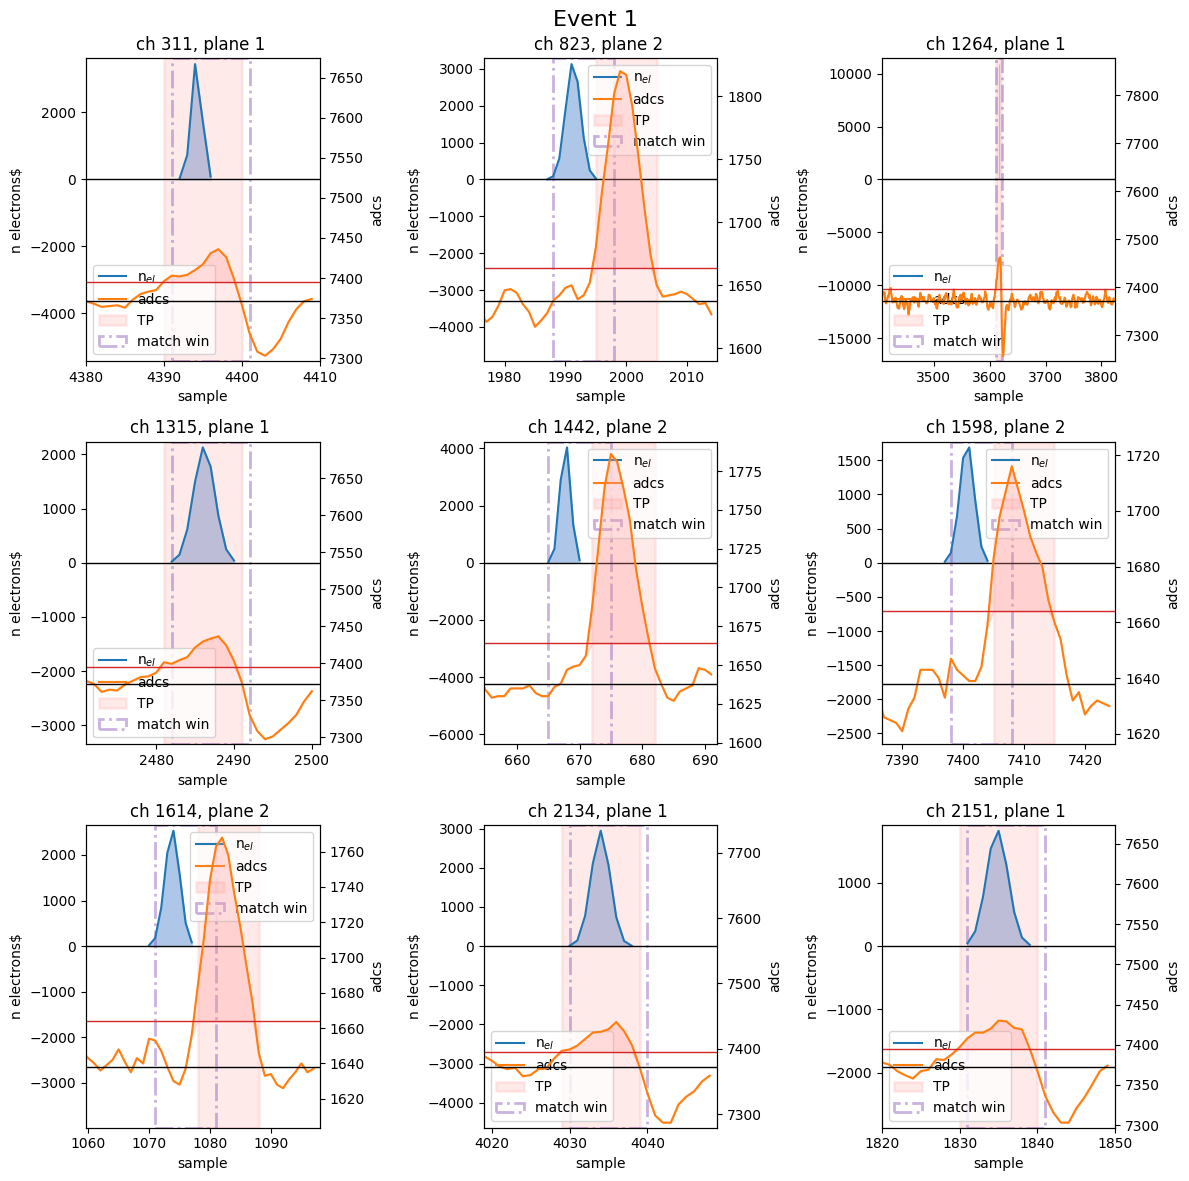

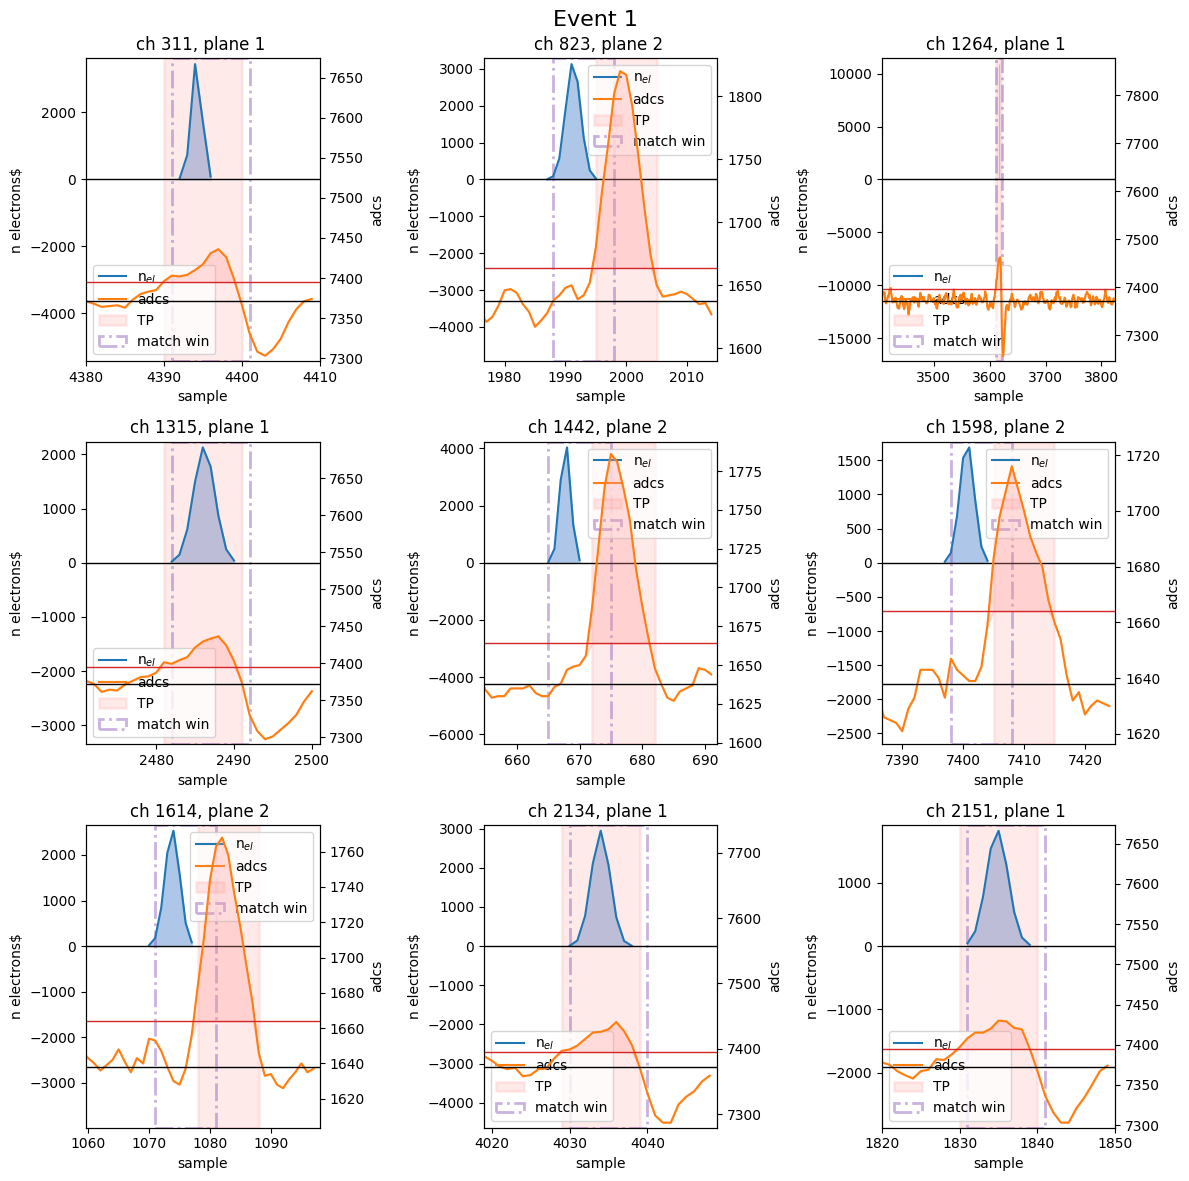

In [ ]:
bt.plot_tps_vs_ides(bt.inspect_tps.query('TP_TOT == 10').iloc[:9], figsize=(12,12))
